In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
df = pd.read_csv("water_dataX.csv", encoding = 'unicode_escape')
df = df.iloc[0:1900,:]

# Data Cleaning

In [3]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [4]:
df = df.drop(columns=["STATION CODE", "LOCATIONS", "STATE", "Temp", "year"])

In [5]:
df.describe()

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
count,1900,1900,1900,1900,1900,1900,1900
unique,166,185,970,403,468,819,1061
top,6.8,7.2,NAN,1.5,NAN,NAN,NAN
freq,110,138,24,75,184,267,119


In [6]:
df.dtypes

D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
dtype: object

In [7]:
# Converting data type to numeric
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [8]:
df.dtypes

D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
dtype: object

In [9]:
# Checking for nan values in each column
df.isnull().sum()

D.O. (mg/l)                          30
PH                                    7
CONDUCTIVITY (µmhos/cm)              24
B.O.D. (mg/l)                        42
NITRATENAN N+ NITRITENANN (mg/l)    189
FECAL COLIFORM (MPN/100ml)          280
TOTAL COLIFORM (MPN/100ml)Mean      130
dtype: int64

In [10]:
df.fillna(df.median(), inplace=True)

In [11]:
df

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,6.7,7.50,203.0,1.8965,0.100,11.0,27.0
1,5.7,7.20,189.0,2.0000,0.200,4953.0,8391.0
2,6.3,6.90,179.0,1.7000,0.100,3243.0,5330.0
3,5.8,6.90,64.0,3.8000,0.500,5382.0,8443.0
4,5.8,7.30,83.0,1.9000,0.400,3428.0,5500.0
...,...,...,...,...,...,...,...
1895,7.4,7.00,88.5,0.9770,0.186,27.0,105.0
1896,6.6,7.81,603.2,2.6750,0.263,40.0,191.0
1897,6.6,7.49,571.5,2.0910,0.256,151.0,273.0
1898,5.4,7.16,75.8,2.0920,0.520,404.0,513.0


In [12]:
df.isnull().sum()

D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
dtype: int64

In [13]:
df.describe()

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1.900000e+03,1.900000e+03
mean,6.360088,7.228177,1850.665384,6.748219,1.545412,3.196323e+05,5.221254e+05
std,1.334036,0.649026,5637.107330,27.391274,3.952962,8.229995e+06,1.408000e+07
min,0.000000,0.000000,11.000000,0.100000,0.000000,0.000000e+00,0.000000e+00
25%,5.900000,6.900000,88.000000,1.200000,0.270000,4.900000e+01,1.147500e+02
50%,6.700000,7.300000,198.000000,1.896500,0.520000,2.330000e+02,4.650000e+02
75%,7.100000,7.600000,617.500000,3.600000,1.280000,7.102500e+02,1.719000e+03
max,11.400000,9.010000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08


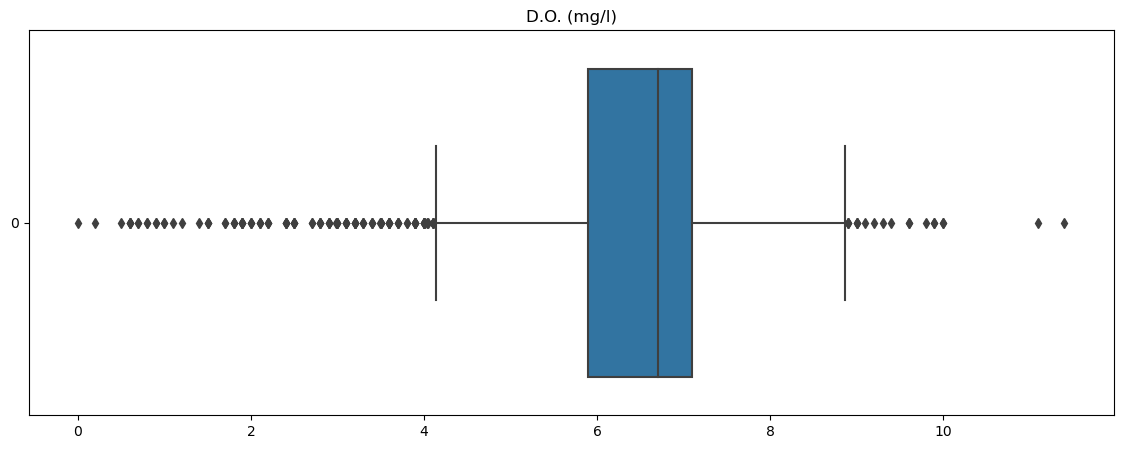

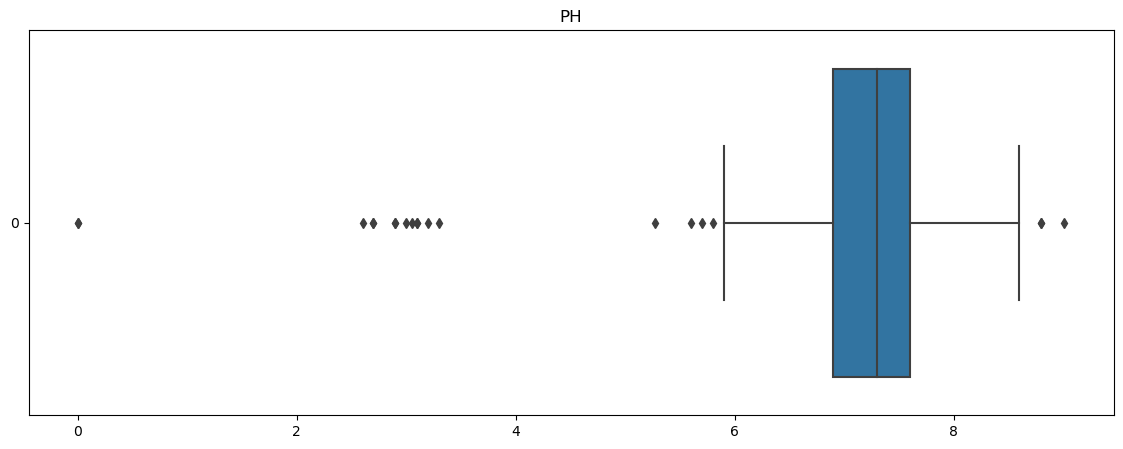

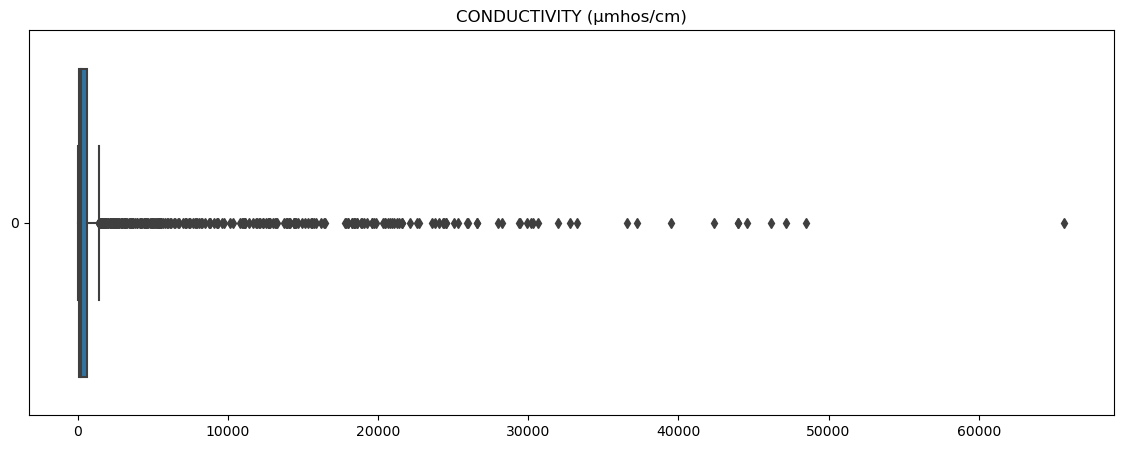

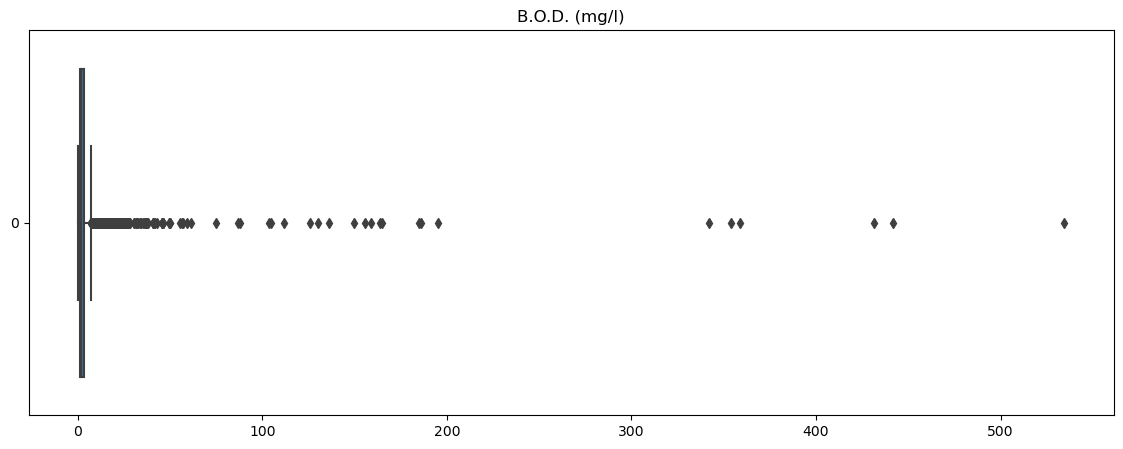

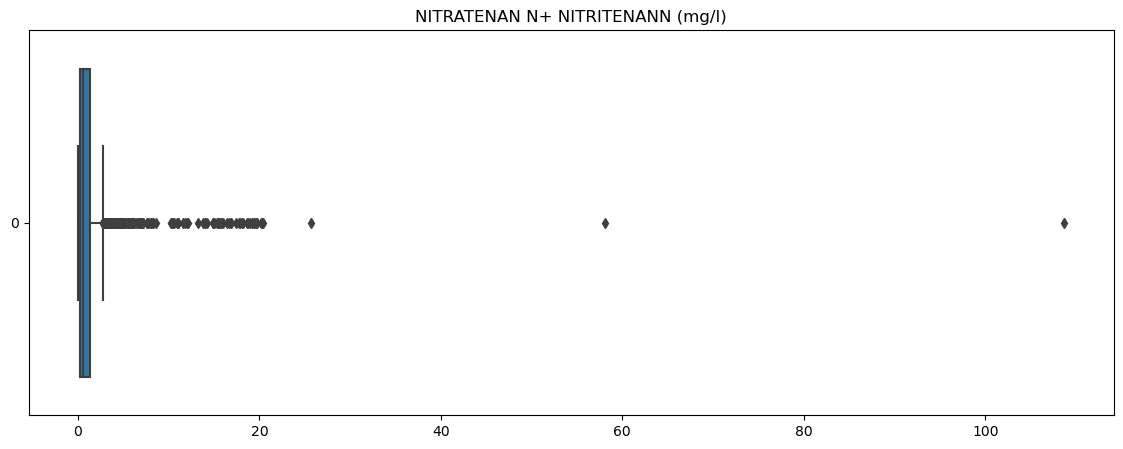

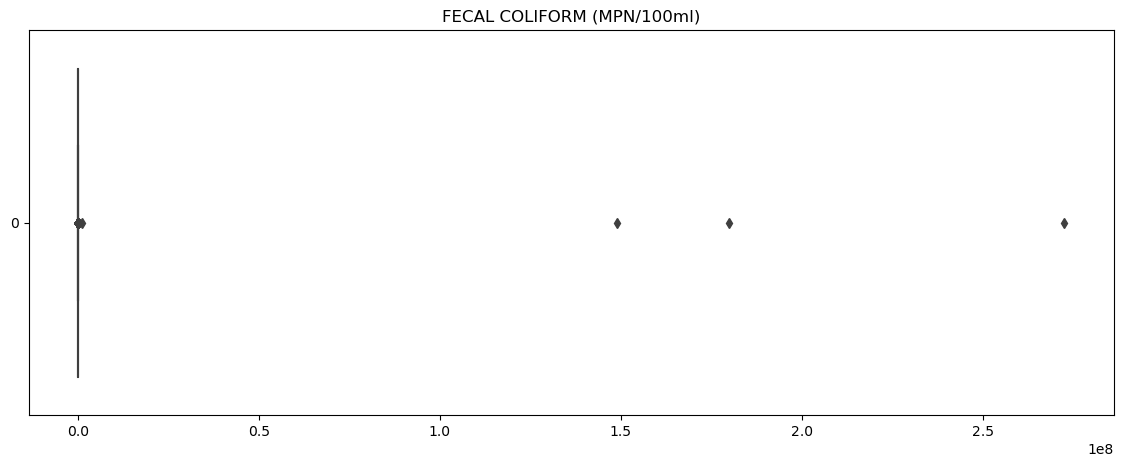

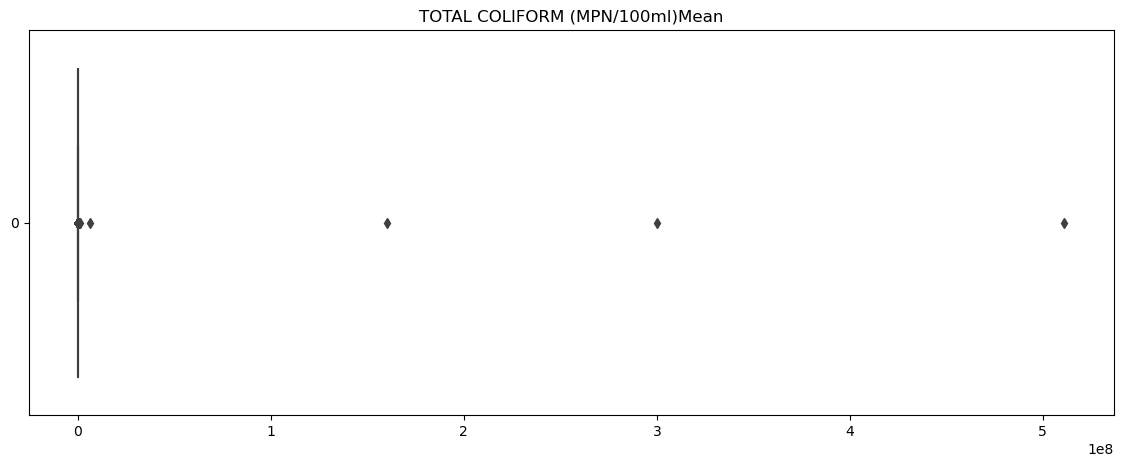

In [14]:
# Drawing box plots to visualize outliers
df_column_names = df.columns
for column in df_column_names:
    plt.figure(figsize=(14,5))
    sns.boxplot(data= df[column], orient="h")
    plt.title(column)
    plt.show()

In [15]:
# Checking for outliers
z_scores = df.apply(zscore)
outliers_count = (z_scores.abs() > 3).sum()
df_outliers = np.where(np.abs(z_scores) > 3)[0]
print(outliers_count)

D.O. (mg/l)                         42
PH                                  14
CONDUCTIVITY (µmhos/cm)             57
B.O.D. (mg/l)                       20
NITRATENAN N+ NITRITENANN (mg/l)    40
FECAL COLIFORM (MPN/100ml)           3
TOTAL COLIFORM (MPN/100ml)Mean       3
dtype: int64


In [16]:
df.iloc[df_outliers]

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
22,2.2,6.50,322.0,4.700,1.200,11210.0,14920.0
37,5.3,7.70,24062.0,9.900,1.200,156.0,304.0
85,2.1,6.80,101.0,1.600,0.800,431.0,694.0
88,3.7,7.70,32005.0,1.200,0.900,40000.0,60392.0
92,1.9,7.70,2941.0,26.900,2.800,10875.0,37375.0
...,...,...,...,...,...,...,...
1837,6.8,7.08,19740.8,0.975,0.165,127.0,515.0
1857,6.4,3.05,605.0,5.067,4.800,18.0,45.0
1866,7.5,7.35,30683.0,2.250,0.745,1515.0,2145.0
1883,6.2,7.63,423.3,7.000,14.013,233.0,43.0


In [17]:
# removing outlliers
df_filtered = df.drop(df.index[df_outliers])

In [18]:
df_filtered

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,6.7,7.50,203.0,1.8965,0.100,11.0,27.0
1,5.7,7.20,189.0,2.0000,0.200,4953.0,8391.0
2,6.3,6.90,179.0,1.7000,0.100,3243.0,5330.0
3,5.8,6.90,64.0,3.8000,0.500,5382.0,8443.0
4,5.8,7.30,83.0,1.9000,0.400,3428.0,5500.0
...,...,...,...,...,...,...,...
1895,7.4,7.00,88.5,0.9770,0.186,27.0,105.0
1896,6.6,7.81,603.2,2.6750,0.263,40.0,191.0
1897,6.6,7.49,571.5,2.0910,0.256,151.0,273.0
1898,5.4,7.16,75.8,2.0920,0.520,404.0,513.0


In [19]:
df_filtered.describe()

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
count,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000
mean,6.523124,7.252104,997.976336,3.714128,1.099985,2194.529100,7170.541284
std,1.077226,0.511447,2774.690335,6.459803,1.613359,8176.692235,40558.974109
min,2.400000,5.600000,11.000000,0.100000,0.000000,0.000000,0.000000
25%,6.096250,6.900000,82.750000,1.100000,0.260000,46.000000,108.750000
50%,6.700000,7.300000,179.000000,1.800000,0.520000,233.000000,465.000000
75%,7.200000,7.600000,455.500000,3.300000,1.010000,637.000000,1600.000000
max,10.000000,9.010000,18569.000000,88.000000,13.200000,150250.000000,967500.000000


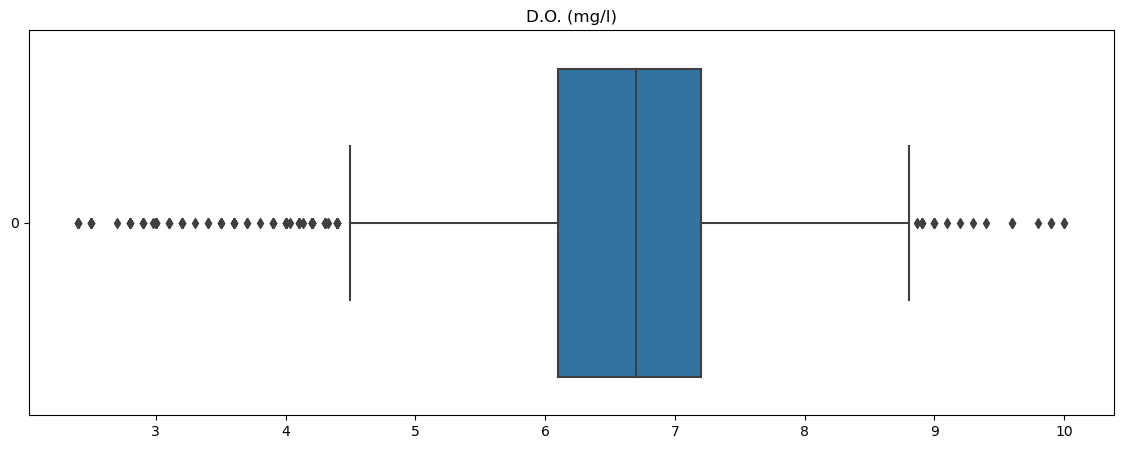

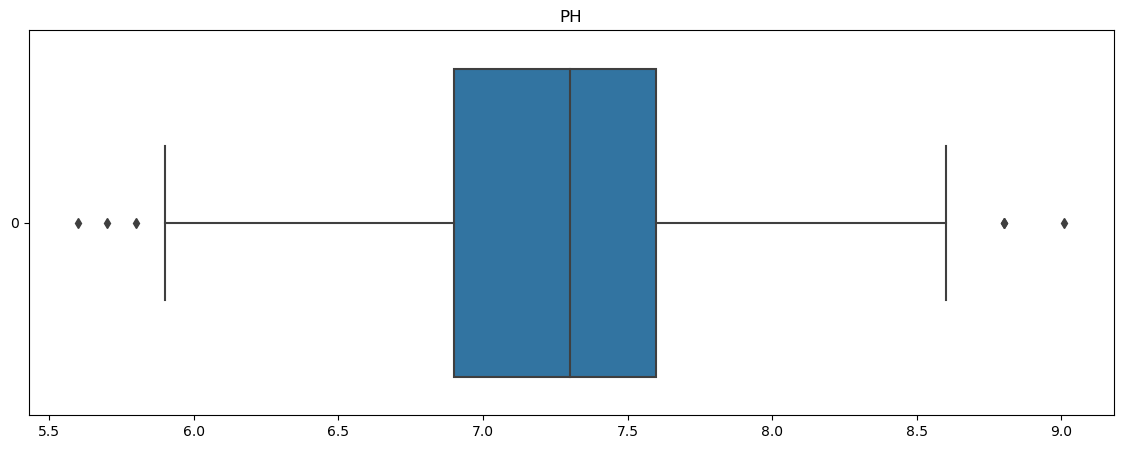

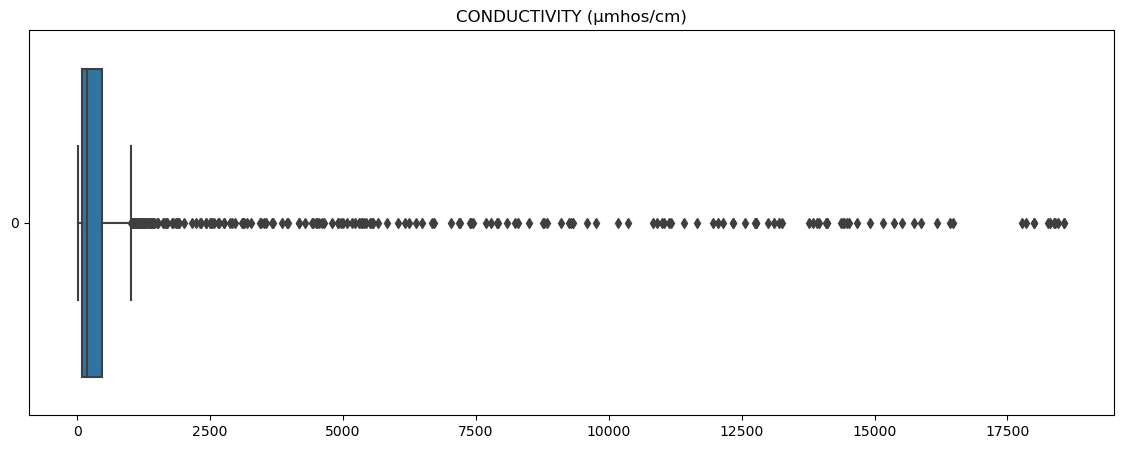

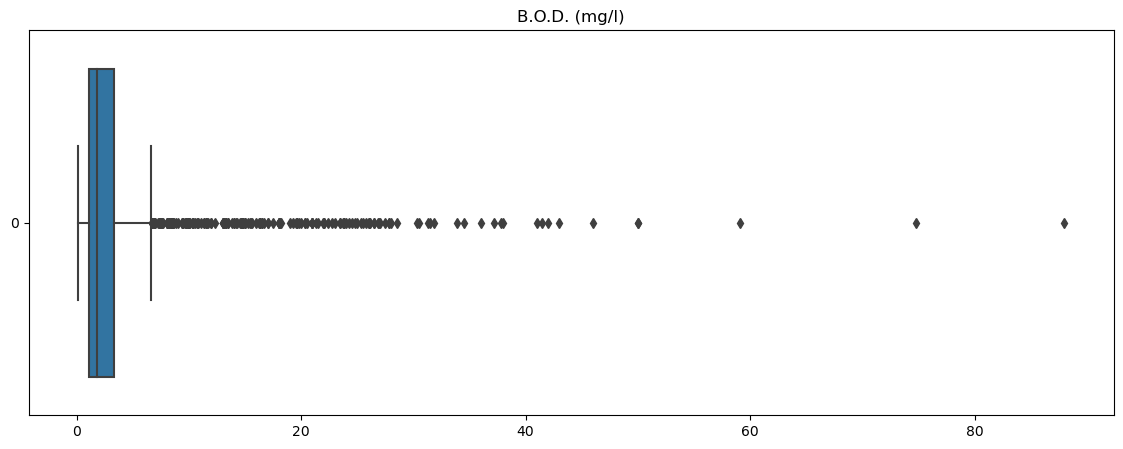

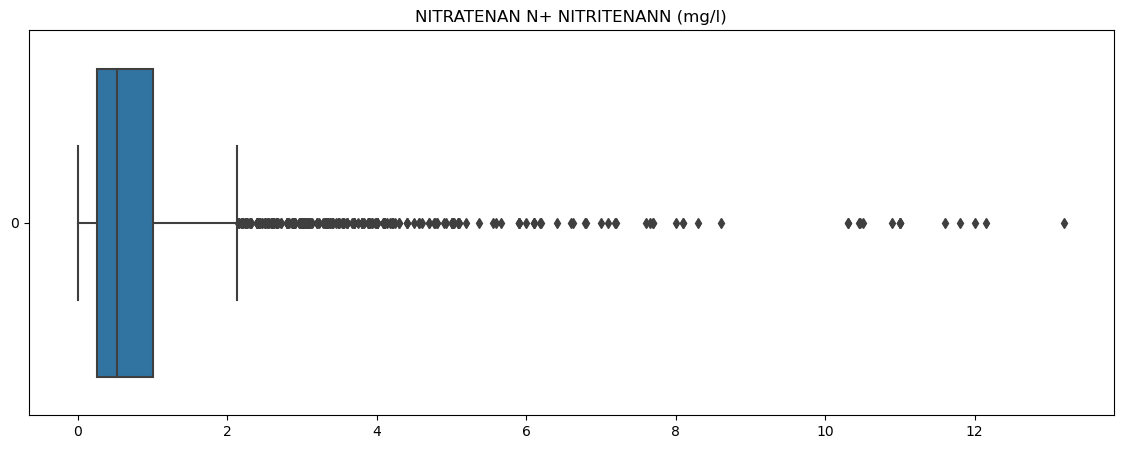

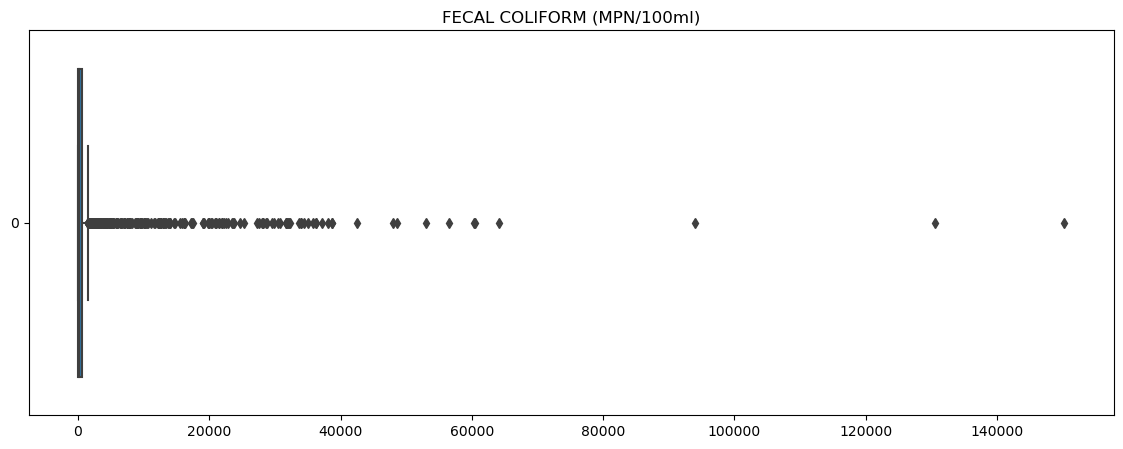

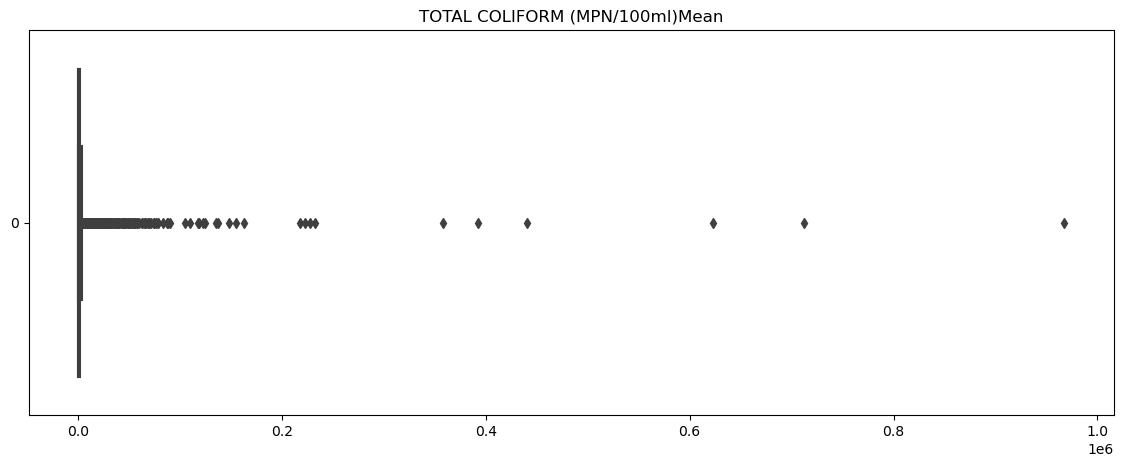

In [20]:
df_filtered_column_names = df_filtered.columns
for column in df_filtered_column_names:
    plt.figure(figsize=(14,5))
    sns.boxplot(data= df_filtered[column], orient="h")
    plt.title(column)
    plt.show()

<Axes: >

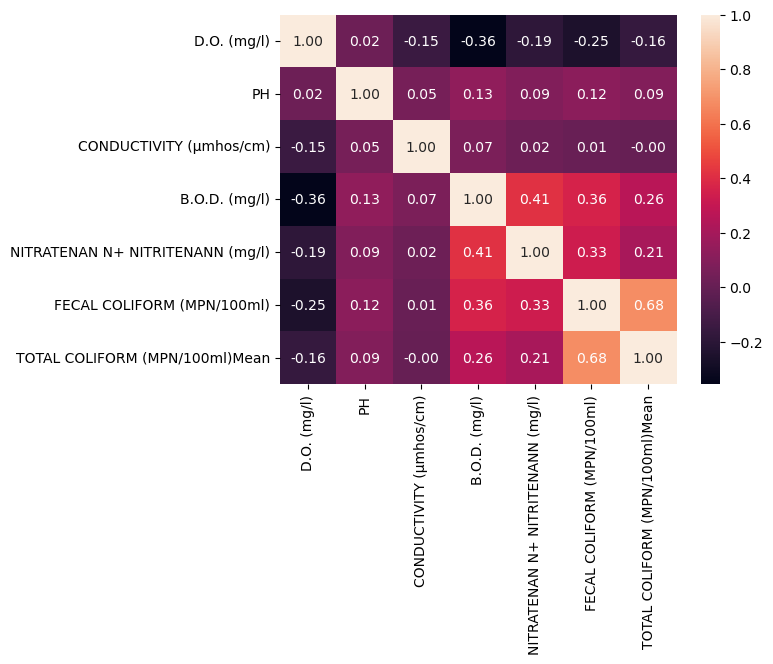

In [21]:
sns.heatmap(df_filtered.corr(), annot = True, fmt = ".2f")

# Calculation The Water Quality Index

In [22]:
# Standard values of parameters
s = np.array([10, 8.5, 1000, 5, 45, 100, 1000])
# Ideal values of parameters
vId = np.array([14.6, 7, 0, 0, 0, 0, 0])
# unit weights
w = np.array([0.2213, 0.2604, 0.0022, 0.4426, 0.492, 0.0221, 0.0022])

In [23]:
def WQI(v):
    wqi = 0
    for i in range(len(v)):
        wqi += 100*((v[i]-vId[i])/(s[i]-vId[i]))*w[i]
    wqi = wqi/np.sum(w)
    return wqi

In [24]:
v = np.array(df_filtered.iloc[0,:])

In [25]:
WQI(v)

44.2727480583246

In [26]:
# Calculating the WQI for the whole dataset
df_rows = df_filtered.shape[0]
wqi = np.zeros((df_rows, 1))
for i in range(df_rows):
    wqi[i] = WQI(np.array(df_filtered.iloc[i,:]))

In [27]:
df_filtered.insert(7, "WQI", wqi, True)

In [28]:
df_filtered

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,WQI
0,6.7,7.50,203.0,1.8965,0.100,11.0,27.0,44.272748
1,5.7,7.20,189.0,2.0000,0.200,4953.0,8391.0,121.680278
2,6.3,6.90,179.0,1.7000,0.100,3243.0,5330.0,87.492536
3,5.8,6.90,64.0,3.8000,0.500,5382.0,8443.0,135.568103
4,5.8,7.30,83.0,1.9000,0.400,3428.0,5500.0,98.272003
...,...,...,...,...,...,...,...,...
1895,7.4,7.00,88.5,0.9770,0.186,27.0,105.0,30.585871
1896,6.6,7.81,603.2,2.6750,0.263,40.0,191.0,53.766237
1897,6.6,7.49,571.5,2.0910,0.256,151.0,273.0,48.035536
1898,5.4,7.16,75.8,2.0920,0.520,404.0,513.0,52.108715


In [29]:
# displaying samples with negative WQI
df_filtered[df_filtered["WQI"] < 0]

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,WQI


In [30]:
# removing samples with negative WQI
df_filtered.drop(df_filtered[df_filtered["WQI"] < 0].index, axis=0, inplace=True)

<Axes: >

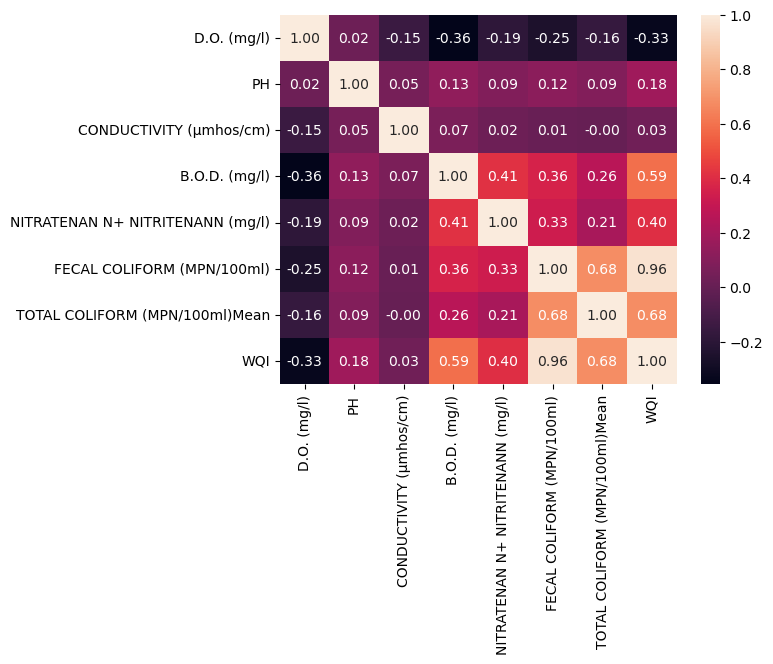

In [31]:
sns.heatmap(df_filtered.corr(), annot = True, fmt = ".2f")

# Predicting the WQI

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import neural_network

## Scaling & Splitting Data

In [33]:
X = df_filtered.iloc[:,:7].values
y= df_filtered.iloc[:,7].values


In [34]:
y.shape

(1744,)

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Multi-layer perceptron

In [37]:
# MLP's heyper parameters
activation = 'tanh'  # Activation function for hidden layers ('relu', 'tanh', 'logistic')
solver = 'lbfgs'  # Solver algorithm ('adam', 'sgd', 'lbfgs')
alpha = 0.0001  # L2 regularization parameter
 # Maximum number of iterations

In [38]:
clf = neural_network.MLPRegressor(max_iter=50000)
clf.fit(X_train, y_train)

MLPRegressor(max_iter=50000)

In [39]:
y_pred_mlp = clf.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred_mlp)
r_squared = metrics.r2_score(y_test, y_pred_mlp)

print("MSE = ", mse)
print("R2 = ", r_squared)

MSE =  0.1631965778632077
R2 =  0.9999925649358941


In [40]:
# Classi
def WQC(wqi):
    wqc = []
    for i in range(wqi.shape[0]):
        if(wqi[i] <= 50):
            wqc.append("good")
        elif(wqi[i] <= 100):
            wqc.append("poor")
        else:
            wqc.append("unsuitable")
    return np.array(wqc)

In [41]:
wqc = WQC(y_test)
wqc_pred_mlp = WQC(y_pred_mlp)

accu = metrics.accuracy_score(wqc, wqc_pred_mlp)
print("MLP Accuracy: ",accu)

MLP Accuracy:  0.994269340974212


## Support vector regressor (SVR)

In [42]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=5, epsilon=0.001)

In [43]:
svr_model.fit(X_train, y_train)

SVR(C=5, epsilon=0.001)

In [44]:
y_pred_svr = svr_model.predict(X_test)

print("MSE = ", metrics.mean_squared_error(y_test, y_pred_svr))
print("R2 = ", metrics.r2_score(y_test, y_pred_svr))

MSE =  14637.2215081688
R2 =  0.33314361323806085


In [45]:
print("SVR Accuracy: ", metrics.accuracy_score(wqc, WQC(y_pred_svr)))

SVR Accuracy:  0.9054441260744985


## Decision Tree Regressor (DT)

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(max_depth=10, min_samples_split=2)

In [47]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [48]:
y_pred_dt = dt_regressor.predict(X_test)

print("MSE = ", metrics.mean_squared_error(y_test, y_pred_dt))
print("R2 = ", metrics.r2_score(y_test, y_pred_dt))

MSE =  391.4569710246589
R2 =  0.982165632929406


In [49]:
print("DT Accuracy: ", metrics.accuracy_score(wqc, WQC(y_pred_dt)))

DT Accuracy:  0.8997134670487106


## K-Nearest Neighbors Regressor (KNN)

In [50]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=1, weights='distance', algorithm='auto')

In [51]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1, weights='distance')

In [52]:
y_pred_knn = knn_regressor.predict(X_test)

print("MSE = ", metrics.mean_squared_error(y_test, y_pred_knn))
print("R2 = ", metrics.r2_score(y_test, y_pred_knn))

MSE =  1242.5433644016161
R2 =  0.9433910337479379


In [53]:
print("KNN Accuracy: ", metrics.accuracy_score(wqc, WQC(y_pred_knn)))

KNN Accuracy:  0.833810888252149


# Predcting The WQC

In [54]:
df_filtered["WQC"] = df_filtered["WQI"].apply(lambda x: (2 if (x <= 50)  
                                        else(1 if (51<=x<=100) 
                                        else 0)))

In [55]:
X = df_filtered.iloc[:,:7].values
y= df_filtered.iloc[:,8].values

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Gradient Boosting (GB)

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=250, learning_rate=0.4, max_depth=1, random_state=42)

In [59]:
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=1, n_estimators=250,
                           random_state=42)

In [60]:
y_pred = gb_classifier.predict(X_test)

In [61]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9398280802292264


## Adaptive Boosting (AdaBoost)

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


base_estimator = DecisionTreeClassifier(max_depth=5)
ada_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=250, learning_rate=0.9, random_state=42)


In [63]:
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.9, n_estimators=250, random_state=42)

In [64]:
y_pred_adaboost = ada_classifier.predict(X_test)

In [65]:
accuracy = metrics.accuracy_score(y_test, y_pred_adaboost)
print("Accuracy:", accuracy)

Accuracy: 0.9312320916905444


## Random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(criterion = 'entropy', n_estimators=100, random_state=42)

In [67]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [68]:
y_pred_rf = rf_classifier.predict(X_test)

In [69]:
accuracy = metrics.accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.9197707736389685


## Xtreme Gradient Boosting

In [82]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=250, learning_rate=0.1, max_depth=3, random_state=42)

In [83]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [84]:
y_pred_xgboost = xgb_classifier.predict(X_test)

In [85]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9398280802292264
